In [2]:
%load_ext autoreload
%autoreload 2
import os
import sys

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)
    

from src.analysis import BehavletsEncoding
from src.visualization import GameVisualizer


In [3]:
encodings = BehavletsEncoding(verbose=True)
vis = GameVisualizer()

import tqdm

with tqdm.tqdm(
    total=len(encodings.reader.level_df.level_id), desc="Calculating Behavlets"
) as pbar:
    for level_id in encodings.reader.level_df.level_id:
        try:
            encodings.calculate_behavlets(level_id=level_id)
            pbar.update(1)

        except Exception as e:
            print(f"error in level id {level_id}: {e}")
            pbar.update(1)

print(
    f"Calculated {len(encodings.instance_details)} behavlets in {len(encodings.reader.level_df)} levels:"
)
for behavlet in encodings.behavlets.values():
    print(
        f"{behavlet.full_name} - {encodings.instance_details.loc[encodings.instance_details['behavlet_name'] == behavlet.name].shape[0]} instances"
    )



INFO - src.analysis.behavlets_encoding - Initializing BehavletsEncoding
INFO - src.analysis.behavlets_encoding - Behavlets initialized: ['Aggression1', 'Aggression3', 'Aggression4', 'Aggression6', 'Caution1']
Calculating Behavlets: 100%|██████████| 938/938 [01:24<00:00, 11.10it/s]

Calculated 5493 behavlets in 938 levels:
Aggression 1 - Hunt close to ghost home - 175 instances
Aggression 3 - Ghost kills - 2635 instances
Aggresssion 4 - Hunt even after powerpill finishes - 219 instances
Aggression 6 - Chase Ghosts or Collect Pellets - 2189 instances
Caution 1 - Times trapped by Ghosts - 275 instances


In [5]:
encodings.get_vector_encodings().index.values


array([1338, 1337, 1336, 1335, 1334, 1333, 1332, 1331, 1330, 1329, 1328,
       1327, 1326, 1325, 1324, 1323, 1322, 1321, 1320, 1319, 1318, 1317,
       1316, 1315, 1314, 1313, 1312, 1311, 1310, 1309, 1308, 1307, 1306,
       1305, 1304, 1303, 1302, 1301, 1300, 1299, 1298, 1297, 1296, 1295,
       1294, 1293, 1292, 1291, 1290, 1288, 1287, 1286, 1285, 1284, 1283,
       1282, 1281, 1280, 1279, 1270, 1269, 1268, 1267, 1266, 1265, 1264,
       1263, 1262, 1261, 1260, 1259, 1258, 1257, 1256, 1255, 1254, 1253,
       1252, 1251, 1250, 1249, 1248, 1247, 1246, 1245, 1244, 1243, 1242,
       1241, 1240, 1239, 1238, 1237, 1236, 1235, 1234, 1233, 1232, 1231,
       1230, 1229, 1228, 1227, 1226, 1225, 1224, 1223, 1222, 1221, 1220,
       1219, 1218, 1217, 1216, 1215, 1214, 1213, 1212, 1211, 1210, 1209,
       1208, 1207, 1206, 1205, 1204, 1203, 1202, 1201, 1200, 1199, 1198,
       1197, 1196, 1195, 1194, 1193, 1192, 1191, 1190, 1189, 1188, 1187,
       1186, 1185, 1184, 1183, 1182, 1181, 1180, 11

Dim.red and clustering 938 levels
clustering complete. Found 6 clusters


c:\Users\Localadmin_pabflore\miniconda3\envs\pacman_encoder\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Localadmin_pabflore\miniconda3\envs\pacman_encoder\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


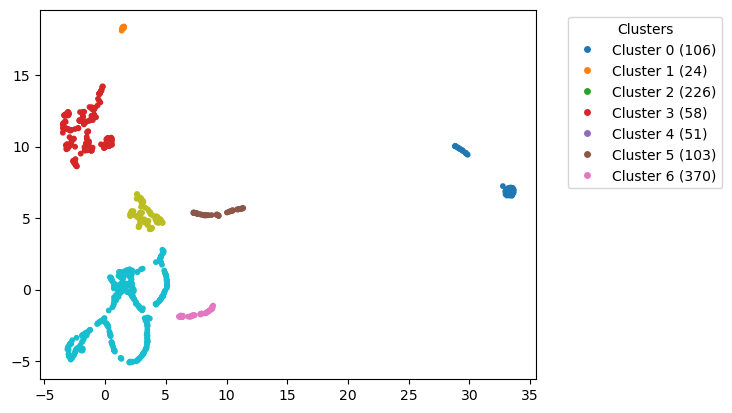

In [ ]:
import hdbscan
import umap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler


features_vector = encodings.get_vector_encodings()

print(f"Dim.red and clustering {features_vector.shape[0]} levels")

reducer = umap.UMAP(n_components=2)
clustering = hdbscan.HDBSCAN(min_cluster_size=20, min_samples=None , metric = "euclidean", algorithm = "best")

standardized_vector = StandardScaler().fit_transform(X=features_vector)

reduced_vector = reducer.fit_transform(standardized_vector)

clustering.fit(X=reduced_vector)

print(f"clustering complete. Found {len(set(clustering.labels_)) - 1} clusters")

np.unique_counts(clustering.labels_)

scatter = plt.scatter(
    x=reduced_vector[:, 0],
    y=reduced_vector[:, 1],
    c=clustering.labels_,
    cmap='tab10',
    s=1
)

# Create a legend for cluster numbers with cluster sizes
handles = []
labels = []
unique_labels = np.unique(clustering.labels_)
for label in unique_labels:
    if label == -1:
        # Noise points
        size = np.sum(clustering.labels_ == -1)
        handles.append(plt.Line2D([], [], marker='o', color='w', markerfacecolor='gray', markersize=6, linestyle='None'))
        labels.append(f'Noise ({size})')
    else:
        size = np.sum(clustering.labels_ == label)
        handles.append(plt.Line2D([], [], marker='o', color='w', markerfacecolor=plt.cm.tab10(label % 10), markersize=6, linestyle='None'))
        labels.append(f'Cluster {label} ({size})')
plt.legend(handles, labels, title="Clusters", bbox_to_anchor=(1.05, 1), loc='upper left')

In [35]:
import umap.plot
umap.plot.output_notebook()

hover_data = pd.DataFrame({
    "level_id": features_vector.index.values,
    "cluster": clustering.labels_,
    # "Aggression1": features_vector["Aggression1_value"].values,
    # "Aggression3": features_vector["Aggression3_value"].values,
    # "Aggression4": features_vector["Aggression4_value"].values,
    # "Aggression6": features_vector["Aggression6_value"].values,
    # "Caution1": features_vector["Caution1_value"].values
})

for behavlet in encodings.behavlets.values():
    hover_data[behavlet.full_name] = features_vector[f"{behavlet.name}_value"].values

p = umap.plot.interactive(reducer, labels=clustering.labels_ , hover_data=hover_data, background="black")
umap.plot.show(p)

Loading BokehJS ...

c:\Users\Localadmin_pabflore\miniconda3\envs\pacman_encoder\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Localadmin_pabflore\miniconda3\envs\pacman_encoder\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


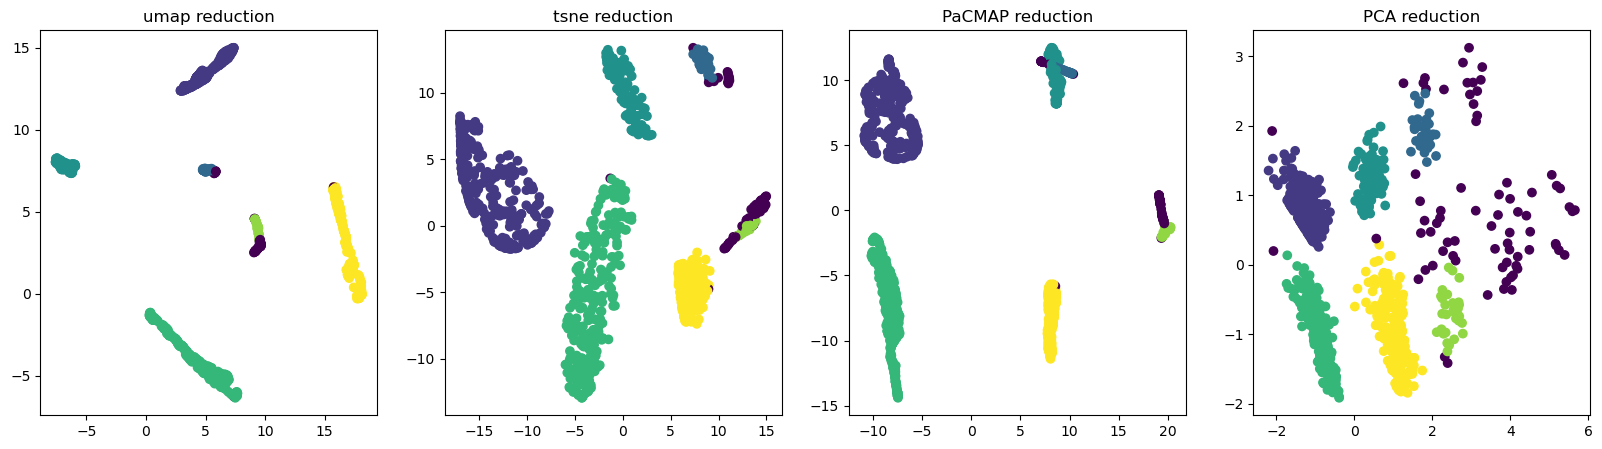

In [ ]:
import umap, hdbscan, umap.plot, pacmap
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

standardized = StandardScaler().fit_transform(X = encodings.reader.level_df.loc[:,["duration","level", "win", "max_score"]]) ## with level metadata

# X = encodings.get_vector_encodings().drop(columns=["Caution2a_value", "Caution2b_value", "Caution3_value"])

# standardized = StandardScaler().fit_transform(X = X)

umap_ = umap.UMAP()
tsne = TSNE(n_components=2)
pacmap_ = pacmap.PaCMAP()
pca_ = PCA(n_components=2)


DIMENSIONS = 3
reducers = {
    "umap" : umap.UMAP(n_components=DIMENSIONS),
    "tsne" : TSNE(n_components=DIMENSIONS),
    "PaCMAP" : pacmap.PaCMAP(n_components=DIMENSIONS),
    "PCA" : PCA(n_components=DIMENSIONS)
}

for reducer in reducers.values():
    reducer.reduced_data_ = reducer.fit_transform(X= standardized)

clustering = hdbscan.HDBSCAN(min_cluster_size=20, min_samples=None , metric = "euclidean", algorithm = "best")
clustering.fit(X=standardized)

# # umap interactive
# umap.plot.output_notebook()
# p = umap.plot.interactive(umap_, hover_data=hover_data, labels= clustering.labels_)
# umap.plot.show(p)

fig, axs = plt.subplots(1,len(reducers), figsize=[5*len(reducers),5])

for i, reducer in enumerate(reducers.values()):
    axs[i].scatter(reducer.reduced_data_[:, 0] , reducer.reduced_data_[:,1], c = clustering.labels_)
    axs[i].set_title(f"{list(reducers.keys())[i]} reduction")

# axs[0].scatter(reduced_tsne[:,0], reduced_tsne[:,1], c = clustering.labels_)
# axs[0].set_title("T-SNE reduccion")
# axs[1].scatter(reduced_umap[:,0], reduced_umap[:,1], c = clustering.labels_)
# axs[1].set_title("UMAP reduction")
# axs[2].scatter(reduced_pacmap[:,0], reduced_pacmap[:, 1], c = clustering.labels_)
# axs[2].set_title("PacMAP reduction")
# axs[3].scatter(reduced_pca[:,0], reduced_pca[:, 1], c = clustering.labels_)
# axs[3].set_title("PCA reduction")